In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
np.random.seed(0)

In [2]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [4]:
y=auto['mpg'].values
x=auto['horsepower'].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [6]:
from sklearn.model_selection import train_test_split
X_trainv, X_valid, Y_trainv, Y_valid = train_test_split(X_train, Y_train, test_size=0.5, random_state=7)

In [7]:
len(Y_trainv)

156

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [9]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_trainv)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_trainv)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on validation data-set
  y_valid_predict = poly_model.predict(poly_features.fit_transform(X_valid))
  
  # evaluating the model on training dataset
  mse_train = mean_squared_error(Y_trainv, y_train_predicted)
  
  # evaluating the model on validation dataset
  mse_valid = mean_squared_error(Y_valid, y_valid_predict)
   
  return (mse_train,mse_valid,degree)

In [11]:
a=[]
for i in range(1,8):
    a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a,columns=['Training Error','Validation Error','Degree'])
df

,Training Error,Validation Error,Degree
0,19.689741,26.998717,1
1,16.720651,19.473031,2
2,16.716183,19.548135,3
3,16.376321,20.597873,4
4,15.998522,20.625272,5
5,15.502682,22.078227,6
6,15.976434,21.400305,7


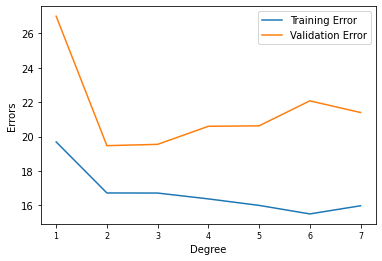

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Degree'].values,df['Training Error'].values, label = 'Training Error')
ax.plot(df['Degree'].values,df['Validation Error'].values,label = 'Validation Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [13]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(mse_test)

23.777949113293726


Text(0, 0.5, 'Errors')

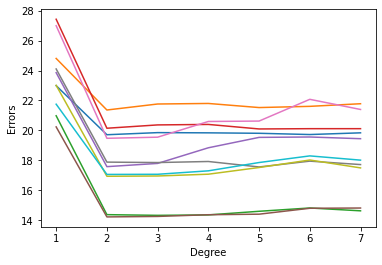

In [14]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range(1,11):
    X_trainv, X_valid, Y_trainv, Y_valid = train_test_split(X_train, Y_train, test_size=0.5, random_state=j)
    a=[]
    for i in range(1,8):
        a.append(create_polynomial_regression_model(i))
    df = pd.DataFrame(a,columns=['Training Error','Validation Error','Degree'])
    ax.plot(df['Degree'].values,df['Validation Error'].values, label = 'Training Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')

In [15]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(mse_test)

23.777949113293726


In [16]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X = np.array([1, 2, 3, 4])
Y = np.array([5 ,6, 7, 8])
for train_index, validation_index in loo.split(X):
    X_train, X_valid = X[train_index], X[validation_index]
    Y_train, Y_valid = Y[train_index], Y[validation_index]
    print(X_train, X_valid)

[2 3 4] [1]
[1 3 4] [2]
[1 2 4] [3]
[1 2 3] [4]


In [17]:
loo.split(X)

<generator object BaseCrossValidator.split at 0x00000286E131B430>

In [18]:
y=np.array(auto['mpg'].values)
x=np.array(auto['horsepower'].values.reshape(-1,1))

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [20]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
LeaveOneOutErrors=[]
for train_index, validation_index in loo.split(X_train):
    X_trainv, X_valid = X_train[train_index], X_train[validation_index]
    Y_trainv, Y_valid = Y_train[train_index], Y_train[validation_index]
    LeaveOneOutErrors.append(create_polynomial_regression_model(4))
df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
LeaveOneOutCV = df[['Training Error','Validation Error']].mean()  
LeaveOneOutCV  

Training Error      17.717221
Validation Error    18.329240
dtype: float64

In [21]:
df

,Training Error,Validation Error,Degree
0,17.773581,0.434358,4
1,17.771648,1.223944,4
2,17.702653,22.750464,4
3,17.765161,3.085358,4
4,17.741839,10.397366,4
...,...,...,...
308,17.764734,3.216237,4
309,17.754606,6.394813,4
310,17.767591,2.313419,4
311,17.773990,0.304625,4


In [22]:
loo = LeaveOneOut()
LeaveOneOutCV=[]
for j in range(1,8):
    LeaveOneOutErrors=[]
    for train_index, validation_index in loo.split(X_train):
        X_trainv, X_valid = X_train[train_index],X_train[validation_index]
        Y_trainv, Y_valid = Y_train[train_index], Y_train[validation_index]
        LeaveOneOutErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
    LeaveOneOutCV.append([df['Validation Error'].mean(),df['Degree'][0]])  
LeaveOneOutCV_df = pd.DataFrame (LeaveOneOutCV,columns=['Validation Error','Degree'])
LeaveOneOutCV_df

,Validation Error,Degree
0,23.581743,1
1,18.087953,2
2,18.182536,3
3,18.329240,4
4,18.257441,5
5,18.386088,6
6,18.373553,7


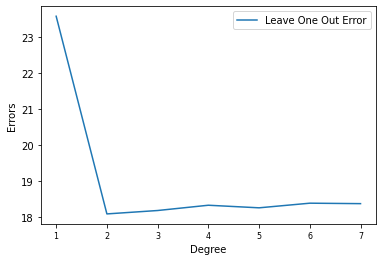

In [23]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LeaveOneOutCV_df['Degree'].values,LeaveOneOutCV_df['Validation Error'].values,label = 'Leave One Out Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [24]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(mse_test)

23.731069041572653


In [26]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,random_state=1, shuffle=True)
X = np.array([1, 2, 3, 4,5,6,7,8,9,10])
Y = np.array([11, 12, 13, 14,15,16,17,18,19,20])
for train_index, validation_index in cv.split(X):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    print(X_train, X_valid)

[1 2 4 5 6 7 8 9] [ 3 10]
[ 1  2  3  4  6  8  9 10] [5 7]
[ 2  3  5  6  7  8  9 10] [1 4]
[ 1  3  4  5  6  7  9 10] [2 8]
[ 1  2  3  4  5  7  8 10] [6 9]


In [27]:
y=np.array(auto['mpg'].values)
x=np.array(auto['horsepower'].values.reshape(-1,1))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [29]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=5, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
    CVErrors.append(create_polynomial_regression_model(2))
df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
kfoldCV = df[['Training Error','Validation Error']].mean()  
kfoldCV  

Training Error      17.768175
Validation Error    17.870217
dtype: float64

In [30]:
df

,Training Error,Validation Error,Degree
0,17.989912,17.055220,2
1,17.388761,19.373706,2
2,17.583495,18.601646,2
3,18.549342,14.710377,2
4,17.329364,19.610135,2


In [31]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
    for j in range(1,8):
        CVErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
df

,Training Error,Validation Error,Degree
0,22.243896,31.826940,1
1,16.808504,26.350335,2
2,16.778261,26.245586,3
3,16.769890,26.133683,4
4,16.640612,25.504794,5
...,...,...,...
65,17.482690,20.442556,3
66,17.480153,20.645721,4
67,17.443759,19.595875,5
68,17.428478,19.227355,6


In [32]:
kfoldCV_by_degree = df.groupby("Degree")
kfoldCV_by_degree = kfoldCV_by_degree.mean()
kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
kfoldCV_by_degree[['Degree', 'Validation Error']]

,Degree,Validation Error
0,1,23.527574
1,2,17.969492
2,3,18.029290
3,4,18.122916
4,5,18.098851
5,6,18.176859
6,7,18.194134


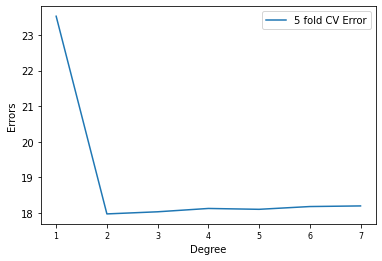

In [33]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_degree['Degree'].values,kfoldCV_by_degree['Validation Error'].values,label = '5 fold CV Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

Text(0, 0.5, 'Errors')

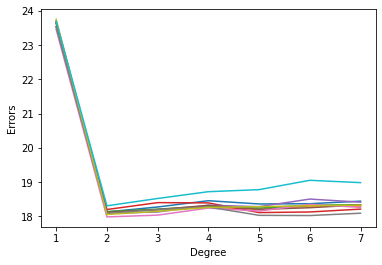

In [34]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range(1,11):
    cv = KFold(n_splits=10, random_state=j, shuffle=True)
    CVErrors=[]
    for train_index, validation_index in cv.split(X_train):
        X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
        for j in range(1,8):
            CVErrors.append(create_polynomial_regression_model(j))
            df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
    kfoldCV_by_degree = df.groupby("Degree")
    kfoldCV_by_degree = kfoldCV_by_degree.mean()
    kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
    kfoldCV_by_degree[['Degree', 'Validation Error']]
    ax.plot(kfoldCV_by_degree['Degree'].values,kfoldCV_by_degree['Validation Error'].values, label = 'Training Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
